In [59]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from openmc.deplete import ResultsList
import openmc

In [60]:
openmc.config['cross_sections'] = '/home/nikita/science/data/endfb-vii.1-hdf5/cross_sections.xml'
openmc.config['chain_file'] = '/home/nikita/science/data/chains/chain_endfb71_pwr.xml'

In [7]:
f = h5py.File('results/2024-11-01_16:13:47/depletion_results.h5', 'r')
f

<HDF5 file "depletion_results.h5" (mode r)>

In [70]:
results =ResultsList.from_hdf5("results/2024-11-01_16:13:47/depletion_results.h5")
results

/home/nikita/.conda/envs/openmc/lib/python3.12/site-packages/openmc/deplete/results.py:91: FutureWarning: The ResultsList.from_hdf5(...) method is no longer necessary and will be removed in a future version of OpenMC. Use Results(...) instead.
  warn(


[<StepResult: t=0.0, dt=1.0, source=1000000.0>,
 <StepResult: t=1.0, dt=2.0, source=1000000.0>,
 <StepResult: t=3.0, dt=3.0, source=1000000.0>,
 <StepResult: t=6.0, dt=0.0, source=1000000.0>]

In [73]:
dir(results)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'export_to_materials',
 'extend',
 'from_hdf5',
 'get_activity',
 'get_atoms',
 'get_decay_heat',
 'get_depletion_time',
 'get_eigenvalue',
 'get_keff',
 'get_mass',
 'get_reaction_rate',
 'get_step_where',
 'get_times',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [72]:
for r in results:
    print(r.time)

[0. 1.]
[1. 3.]
[3. 6.]
[6. 6.]


In [81]:
results.get_atoms('2','U235')

(array([0., 1., 3., 6.]),
 array([1.88445476e+23, 1.88445439e+23, 1.88445364e+23, 1.88445252e+23]))

In [84]:
results.get_decay_heat('2')

(array([0., 1., 3., 6.]),
 array([1.34042201e-04, 5.26830131e+03, 1.07090449e+04, 1.52763143e+04]))

In [64]:
results.get_atoms(mat='2', nuc='U235')[1], results.get_atoms(mat='2', nuc='U238')[1]

(array([1.88445476e+23, 1.88445439e+23, 1.88445364e+23, 1.88445252e+23]),
 array([3.53272673e+24, 3.53272672e+24, 3.53272671e+24, 3.53272668e+24]))

In [3]:
f.keys()

<KeysViewHDF5 ['depletion time', 'eigenvalues', 'materials', 'nuclides', 'number', 'reaction rates', 'reactions', 'source_rate', 'time']>

In [4]:
for key,value in f.items():
    try:
        print(key, value.shape)
    except:
        print(key, value)

depletion time (4,)
eigenvalues (4, 1, 2)
materials <HDF5 group "/materials" (1 members)>
nuclides <HDF5 group "/nuclides" (3819 members)>
number (4, 1, 1, 3819)
reaction rates (4, 1, 1, 421, 7)
reactions <HDF5 group "/reactions" (7 members)>
source_rate (4, 1)
time (4, 2)


In [48]:
f['number']

<HDF5 dataset "number": shape (4, 1, 1, 3819), type "<f8">

/tmp/ipykernel_172111/2693357386.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])


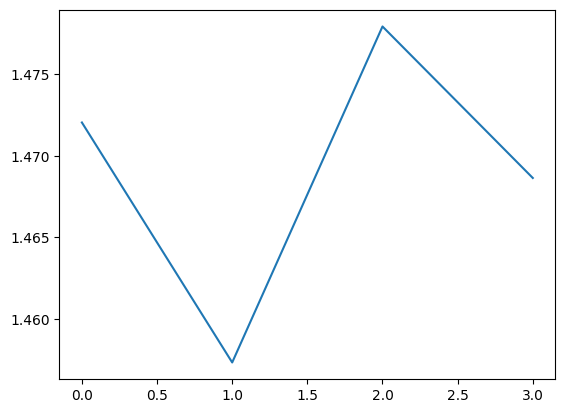

In [5]:
plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])

In [32]:
for rname, rdata in f['reactions'].items():
    print(rname, rdata)

(n,2n) <HDF5 group "/reactions/(n,2n)" (0 members)>
(n,3n) <HDF5 group "/reactions/(n,3n)" (0 members)>
(n,4n) <HDF5 group "/reactions/(n,4n)" (0 members)>
(n,a) <HDF5 group "/reactions/(n,a)" (0 members)>
(n,gamma) <HDF5 group "/reactions/(n,gamma)" (0 members)>
(n,p) <HDF5 group "/reactions/(n,p)" (0 members)>
fission <HDF5 group "/reactions/fission" (0 members)>


In [42]:
f['reaction rates']

<HDF5 dataset "reaction rates": shape (4, 1, 1, 421, 7), type "<f8">

In [14]:
dir(f['nuclides'].items())

['__abstractmethods__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_from_iterable',
 '_hash',
 '_mapping',
 'isdisjoint']

In [23]:
i = 0
for key,value in f['nuclides'].items():
    # if len(value)>0:
        print(key, value.keys())
        i+=1
    # if i>=5:
    #     break    

Ac206 <KeysViewHDF5 []>
Ac206_m1 <KeysViewHDF5 []>
Ac207 <KeysViewHDF5 []>
Ac208 <KeysViewHDF5 []>
Ac208_m1 <KeysViewHDF5 []>
Ac209 <KeysViewHDF5 []>
Ac210 <KeysViewHDF5 []>
Ac211 <KeysViewHDF5 []>
Ac212 <KeysViewHDF5 []>
Ac213 <KeysViewHDF5 []>
Ac214 <KeysViewHDF5 []>
Ac215 <KeysViewHDF5 []>
Ac216 <KeysViewHDF5 []>
Ac216_m1 <KeysViewHDF5 []>
Ac217 <KeysViewHDF5 []>
Ac218 <KeysViewHDF5 []>
Ac219 <KeysViewHDF5 []>
Ac220 <KeysViewHDF5 []>
Ac221 <KeysViewHDF5 []>
Ac222 <KeysViewHDF5 []>
Ac222_m1 <KeysViewHDF5 []>
Ac223 <KeysViewHDF5 []>
Ac224 <KeysViewHDF5 []>
Ac225 <KeysViewHDF5 []>
Ac226 <KeysViewHDF5 []>
Ac227 <KeysViewHDF5 []>
Ac228 <KeysViewHDF5 []>
Ac229 <KeysViewHDF5 []>
Ac230 <KeysViewHDF5 []>
Ac231 <KeysViewHDF5 []>
Ac232 <KeysViewHDF5 []>
Ac233 <KeysViewHDF5 []>
Ac234 <KeysViewHDF5 []>
Ac235 <KeysViewHDF5 []>
Ac236 <KeysViewHDF5 []>
Ag100 <KeysViewHDF5 []>
Ag100_m1 <KeysViewHDF5 []>
Ag101 <KeysViewHDF5 []>
Ag101_m1 <KeysViewHDF5 []>
Ag102 <KeysViewHDF5 []>
Ag102_m1 <KeysViewHDF5

In [20]:
dir(value)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir